In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from differentiable_lensing import DifferentiableLensing

In [2]:
device = 'cpu'

Loading datasets

In [3]:
train_smooth_galaxies = np.load('datasets/sources/train_smooth_galaxies.npy')
train_spiral_galaxies = np.load('datasets/sources/train_spiral_galaxies.npy')

Reshaping images to c, h, w as compatible with the pytorch modules

In [4]:
train_smooth = torch.tensor(train_smooth_galaxies, dtype=torch.float32, device=device)
train_spiral = torch.tensor(train_spiral_galaxies, dtype=torch.float32, device=device)
train_smooth, train_spiral = torch.permute(train_smooth, (0, 3, 1, 2)), torch.permute(train_spiral, (0, 3, 1, 2))

In [5]:
lensing_module = DifferentiableLensing(device, target_resolution=0.262, target_shape=256, alpha=None)

Sources pre-lensing for reference

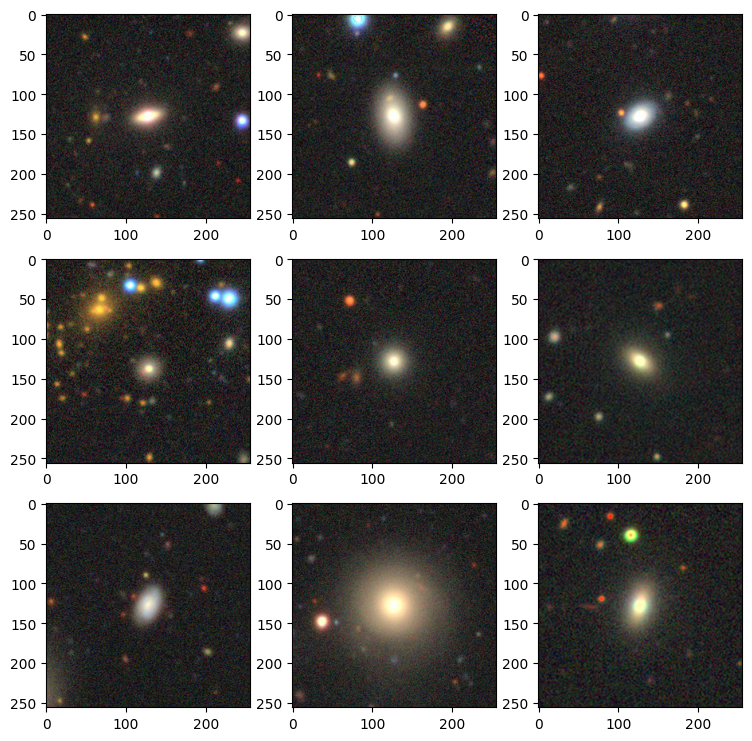

In [6]:
plot, axes = plt.subplots(3, 3)
plot.set_size_inches(9,9)
i = 0
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(Image.fromarray(train_smooth_galaxies[i+3*j]))

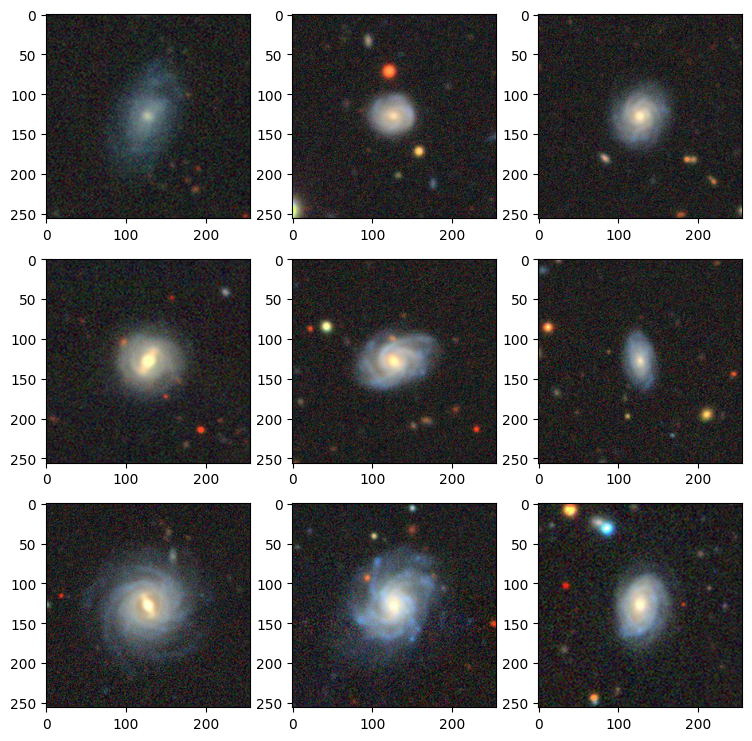

In [7]:
plot, axes = plt.subplots(3, 3)
plot.set_size_inches(9,9)
i = 0
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(Image.fromarray(train_spiral_galaxies[i+3*j]))

Setting the deflection field, constructing the source and image grids, and lensing the source galaxies

In [8]:
alpha_r = 7
alpha = lensing_module.construct_sis(alpha_r)
lensing_module.set_alpha(alpha)
lensing_images_spiral = lensing_module.forward(train_spiral)
lensing_images_smooth = lensing_module.forward(train_smooth)

Plotting the lensed images

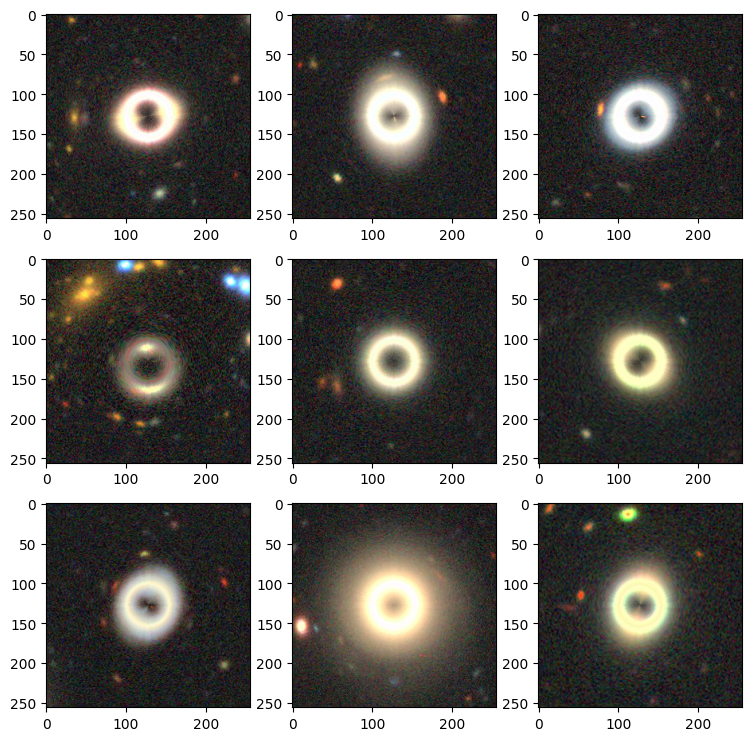

In [9]:
plot, axes = plt.subplots(3, 3)
plot.set_size_inches(9,9)
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(lensing_images_smooth[i+3*j].detach().permute(1,2,0).numpy().astype('int'))

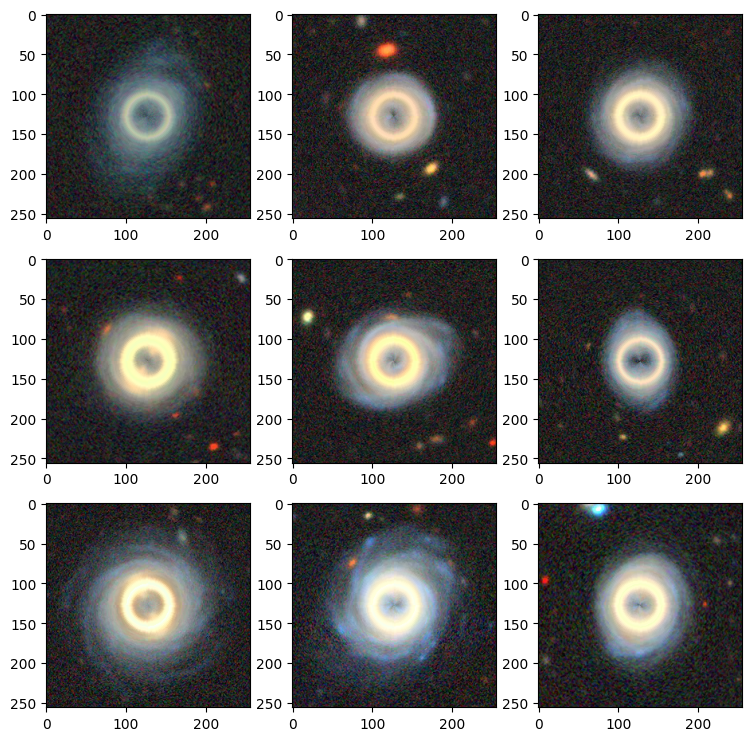

In [10]:
plot, axes = plt.subplots(3, 3)
plot.set_size_inches(9,9)
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(lensing_images_spiral[i+3*j].detach().permute(1,2,0).numpy().astype('int'))